In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('datasets/Handwritten English Alphabets/handwritten_english_alphabets.csv')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)

In [7]:
data.shape

(372450, 785)

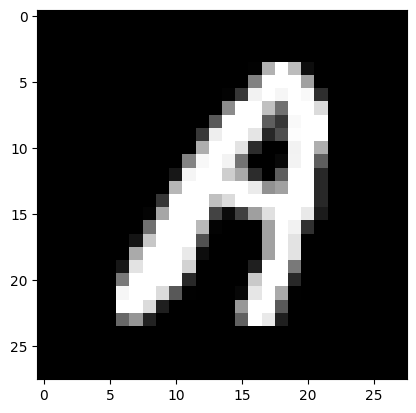

In [8]:
plt.imshow(data[0][1:].reshape(28,28), cmap='gray')

In [9]:
np.random.shuffle(data)

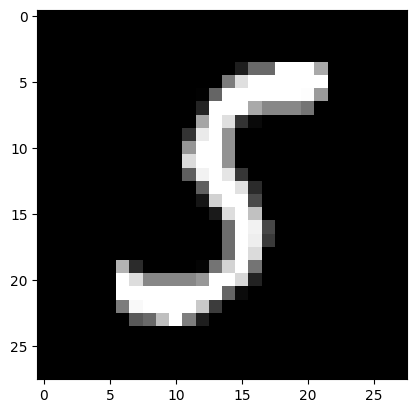

In [10]:
plt.imshow(data[0][1:].reshape(28,28), cmap='gray')

In [11]:
m, n = data.shape

In [12]:
data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_, m_train = x_train.shape

In [13]:
def init_params():
    w1 = np.random.rand(26, 784) - 0.5
    b1 = np.random.rand(26, 1) - 0.5
    w2 = np.random.rand(26, 26) - 0.5
    b2 = np.random.rand(26, 1) - 0.5
    return w1, b1, w2, b2

def relu(z):
    return np.maximum(z, 0)

def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a
    
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def relu_deriv(z):
    return z > 0

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * relu_deriv(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2

In [14]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    accuracies = []  
    iterations_list = []  

    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(a2)
            accuracy = get_accuracy(predictions, y)
            accuracies.append(accuracy)
            iterations_list.append(i)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(iterations_list, accuracies, marker='o', linestyle='-')
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.title("Training Accuracy Over Iterations")
    plt.grid(True)
    plt.show()

    return w1, b1, w2, b2

[21 12 12 ... 21  3 17] [14  5 19 ...  0 23 12]
Iteration 0: Accuracy = 0.0327
[12 12 12 ... 14 25  2] [14  5 19 ...  0 23 12]
Iteration 10: Accuracy = 0.2234
[20 19 12 ... 14 25 20] [14  5 19 ...  0 23 12]
Iteration 20: Accuracy = 0.3068
[12 19 12 ... 18 18 20] [14  5 19 ...  0 23 12]
Iteration 30: Accuracy = 0.3587
[12 19 12 ... 18 18 20] [14  5 19 ...  0 23 12]
Iteration 40: Accuracy = 0.3987
[12 19 12 ... 18 18 20] [14  5 19 ...  0 23 12]
Iteration 50: Accuracy = 0.4312
[12 19 12 ... 18 18 13] [14  5 19 ...  0 23 12]
Iteration 60: Accuracy = 0.4579
[12 19 12 ... 18 18 13] [14  5 19 ...  0 23 12]
Iteration 70: Accuracy = 0.4809
[12 19 19 ... 18 18 13] [14  5 19 ...  0 23 12]
Iteration 80: Accuracy = 0.5015
[12 19 19 ... 11 23 13] [14  5 19 ...  0 23 12]
Iteration 90: Accuracy = 0.5191
[12 19 19 ... 11 23 13] [14  5 19 ...  0 23 12]
Iteration 100: Accuracy = 0.5354
[12 19 19 ... 11 23 13] [14  5 19 ...  0 23 12]
Iteration 110: Accuracy = 0.5505
[12 19 19 ... 11 23 13] [14  5 19 ...  

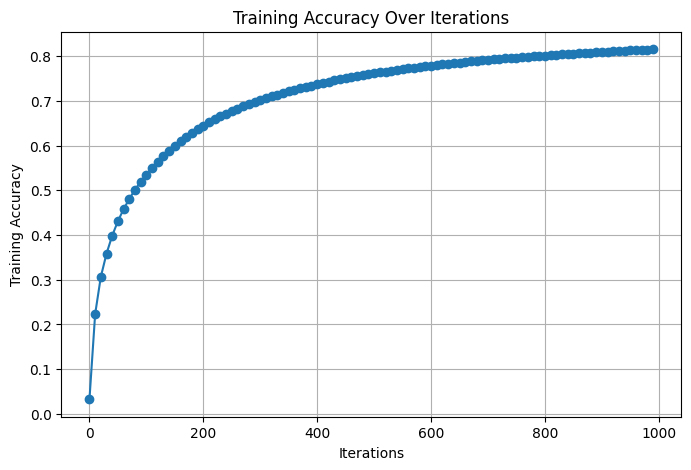

In [15]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 1000)

In [16]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [17]
Label:  4


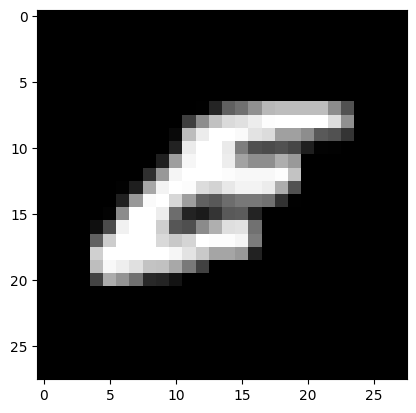

Prediction:  [14]
Label:  14


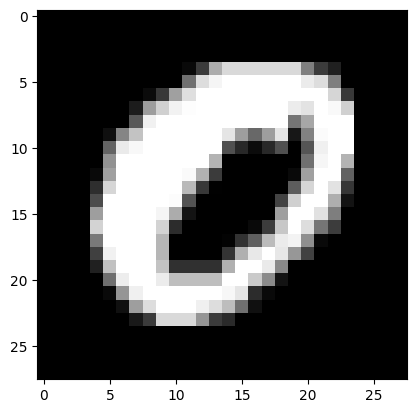

Prediction:  [18]
Label:  18


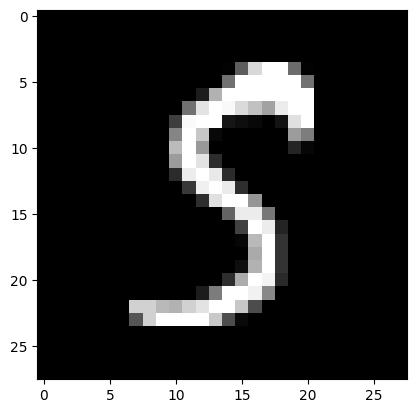

Prediction:  [24]
Label:  24


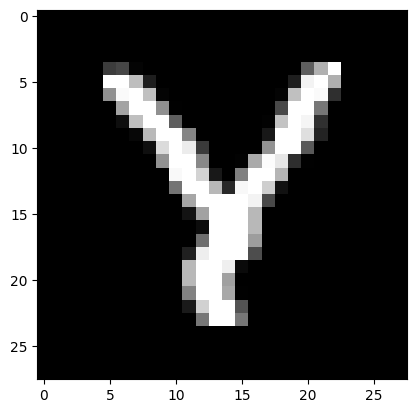

Prediction:  [18]
Label:  18


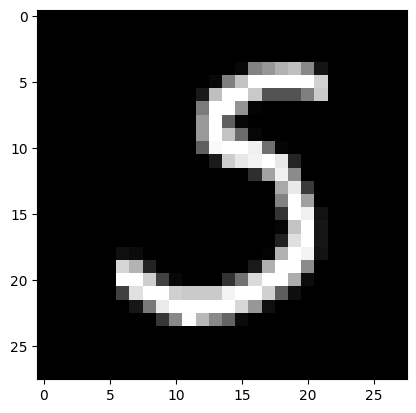

Prediction:  [18]
Label:  18


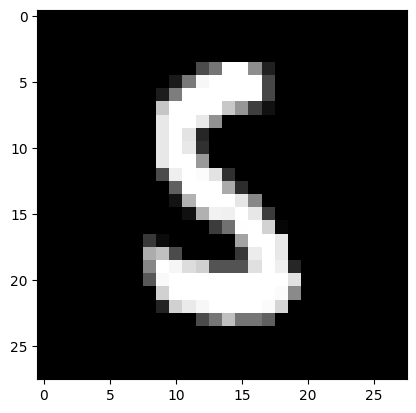

Prediction:  [0]
Label:  0


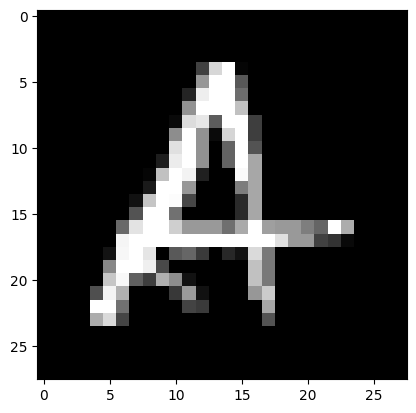

Prediction:  [15]
Label:  15


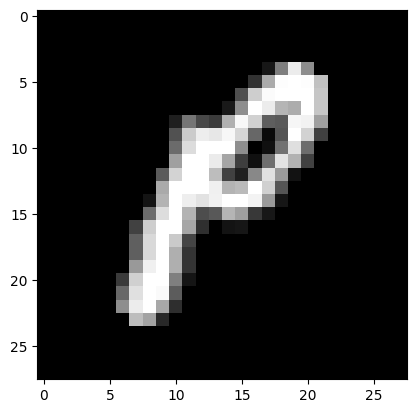

Prediction:  [23]
Label:  23


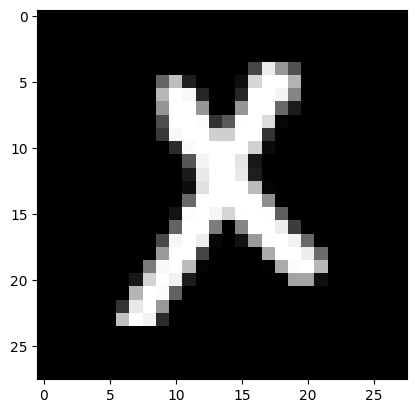

Prediction:  [25]
Label:  25


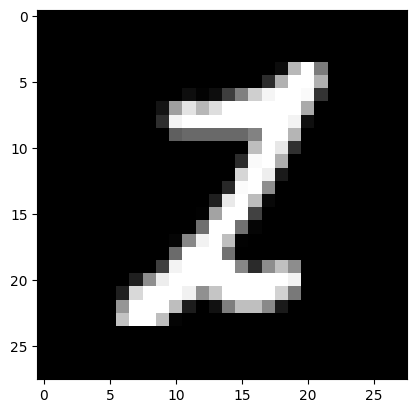

In [17]:
test_prediction(100, w1, b1, w2, b2)
test_prediction(1000, w1, b1, w2, b2)
test_prediction(2000, w1, b1, w2, b2)
test_prediction(3330, w1, b1, w2, b2)
test_prediction(26580, w1, b1, w2, b2)
test_prediction(42380, w1, b1, w2, b2)
test_prediction(34640, w1, b1, w2, b2)
test_prediction(26740, w1, b1, w2, b2)
test_prediction(46960, w1, b1, w2, b2)
test_prediction(25810, w1, b1, w2, b2)